In [13]:
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class net_class1(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4], out_features=1, bias=True, act_fun=torch.relu, BN_mode=None, momentum=0.1):
        super(net_class1, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden1_bn1d = nn.BatchNorm1d(num_features=hidden_features[0], momentum=momentum)
        self.output_linear = nn.Linear(in_features=hidden_features[0], out_features=out_features, bias=bias)
        self.BN_mode = BN_mode
        self.act_fun = act_fun
        
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        if self.BN_mode == None:
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
        elif self.BN_mode == 'before':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            
            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            zhat_norm = self.hidden1_bn1d(zhat)
            
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第一层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
        elif self.BN_mode == 'after':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            sigma_norm = self.hidden1_bn1d(sigma)

            # 隐藏层第一层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma_norm)
        return zhat

In [14]:
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class net_class2(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4], out_features=1, bias=True, act_fun=torch.relu, BN_mode=None, momentum=0.1):
        super(net_class2, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden1_bn1d = nn.BatchNorm1d(num_features=hidden_features[0], momentum=momentum)
        
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden2_bn1d = nn.BatchNorm1d(num_features=hidden_features[1], momentum=momentum)
        
        self.output_linear = nn.Linear(in_features=hidden_features[1], out_features=out_features, bias=bias)
        self.BN_mode = BN_mode
        self.act_fun = act_fun
        
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        if self.BN_mode == None:
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层不工作) -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第三层 -> 隐藏层第四层(数据归一化层不工作) -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'before':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            zhat_norm = self.hidden1_bn1d(zhat)       
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层) -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            zhat_norm = self.hidden2_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层等三层 -> 输出层
            zhat = self.output_linear(sigma)
        
        elif self.BN_mode == 'after':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 调整当前数据的各个原始特征变量or中间隐藏变量的数据的分布
            sigma_norm = self.hidden1_bn1d(sigma)

            # 隐藏层第一层 -> 隐藏层第二层(数据归一化层) -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden2_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 调整分布
            sigma_norm = self.hidden2_bn1d(sigma)

            # 隐藏层第三层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma_norm)
        return zhat

In [15]:
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class net_class3(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4], out_features=1, bias=True, act_fun=torch.relu, BN_mode=None, momentum=0.1):
        super(net_class3, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden1_bn1d = nn.BatchNorm1d(num_features=hidden_features[0], momentum=momentum)
        
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden2_bn1d = nn.BatchNorm1d(num_features=hidden_features[1], momentum=momentum)

        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.hidden3_bn1d = nn.BatchNorm1d(num_features=hidden_features[2], momentum=momentum)
        
        self.output_linear = nn.Linear(in_features=hidden_features[2], out_features=out_features, bias=bias)
        self.BN_mode = BN_mode
        self.act_fun = act_fun
        
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        if self.BN_mode == None:
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第三层 -> 输出层
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'before':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden1_bn1d(zhat)       
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden2_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden3_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第三层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'after':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden1_bn1d(sigma)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden2_bn1d(sigma)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden3_bn1d(sigma)

            # 隐藏层第三层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma_norm)
        return zhat

In [16]:
# 搭建模型: 使用面向对象(定义类/创建对象)的方式 继承nn.Module类
class net_class4(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=2, hidden_features=[4, 4, 4, 4], out_features=1, bias=True, act_fun=torch.relu, BN_mode=None, momentum=0.1):
        super(net_class4, self).__init__()

        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=hidden_features[0], bias=bias)
        self.hidden1_bn1d = nn.BatchNorm1d(num_features=hidden_features[0], momentum=momentum)
        
        self.hidden2_linear = nn.Linear(in_features=hidden_features[0], out_features=hidden_features[1], bias=bias)
        self.hidden2_bn1d = nn.BatchNorm1d(num_features=hidden_features[1], momentum=momentum)

        self.hidden3_linear = nn.Linear(in_features=hidden_features[1], out_features=hidden_features[2], bias=bias)
        self.hidden3_bn1d = nn.BatchNorm1d(num_features=hidden_features[2], momentum=momentum)

        self.hidden4_linear = nn.Linear(in_features=hidden_features[2], out_features=hidden_features[3], bias=bias)
        self.hidden4_bn1d = nn.BatchNorm1d(num_features=hidden_features[3], momentum=momentum)
        
        self.output_linear = nn.Linear(in_features=hidden_features[3], out_features=out_features, bias=bias)
        self.BN_mode = BN_mode
        self.act_fun = act_fun
        
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        if self.BN_mode == None:
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第三层 -> 隐藏层第四层
            # 整合信息
            zhat = self.hidden4_linear(sigma)
            # 加工信息
            sigma = self.act_fun(zhat)

            # 隐藏层第四层 -> 输出层
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'before':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden1_bn1d(zhat)       
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden2_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden3_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第三层 -> 隐藏层第四层
            # 整合信息
            zhat = self.hidden4_linear(sigma)
            # 在加工信息之前调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            zhat_norm = self.hidden4_bn1d(zhat)
            # 加工信息
            sigma = self.act_fun(zhat_norm)

            # 隐藏层第四层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma)
            
        elif self.BN_mode == 'after':
            # 输入层 -> 隐藏层第一层
            # 整合信息
            zhat = self.hidden1_linear(X)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden1_bn1d(sigma)

            # 隐藏层第一层 -> 隐藏层第二层
            # 整合信息
            zhat = self.hidden2_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden2_bn1d(sigma)

            # 隐藏层第二层 -> 隐藏层第三层
            # 整合信息
            zhat = self.hidden3_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden3_bn1d(sigma)

            # 隐藏层第三层 -> 隐藏层第四层
            # 整合信息
            zhat = self.hidden4_linear(sigma_norm)
            # 加工信息
            sigma = self.act_fun(zhat)
            # 在加工信息之后调整整合信息得到的当前batch的各个中间潜在变量的均值和方差
            sigma_norm = self.hidden4_bn1d(sigma)

            # 隐藏层第四层 -> 输出层
            # 整合信息
            zhat = self.output_linear(sigma_norm)
        return zhat

假设观测特征变量和观测标签之间的自然规律因果关系为: $y = 2x_1^2 - x_2^2$

In [18]:
torch.manual_seed(1998)

# 加载原始的数据集
X, y = tensorGenReg(w=[2, -1], bias=False, degree=2)

# 如果深度神经网络模型需要学习的数据集的特征变量和标签是分开存储的, 则先将特征变量和标签按照样本的编号进行合并
# 对于合并后的完整的数据集, 先根据指定的比例将其划分为训练数据集和测试数据集
# 再根据指定的样本容量将训练数据集和测试数据集分别划分为若干个互不相交的子数据集
dataset_train, dataset_loss = split_loader(X=X, y=y, batch_size=50)

In [36]:
torch.manual_seed(24)

# 实例化模型: 相同的隐藏层层数(depth), 相同的激活函数, 但是一个模型使用归一化层另外一个不使用
sigmoid_model1 = net_class1(act_fun=torch.sigmoid, BN_mode=None)
sigmoid_model1_norm = net_class1(act_fun=torch.sigmoid, BN_mode="before")

models = [sigmoid_model1, sigmoid_model1_norm]
model_names = ["sigmoid_model1", "sigmoid_model1_norm"]

# 训练模型
n_epochs = 40
losses_train, losses_test = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                      models=models, model_names=model_names, criterion=nn.MSELoss(), optimizer=optim.SGD, lr=0.03,
                                                      task="reg", evaluation=calc_mse)

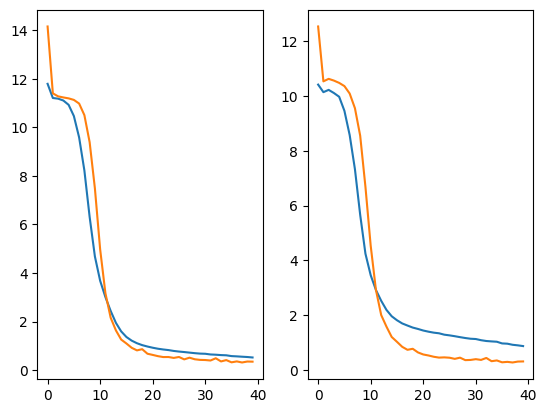

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2)  # 相当于绘制一个figure, 然后figure中可以有多个panels
for i, loss in enumerate([losses_train, losses_test]):
    axs[i].plot(list(range(n_epochs)), loss[0], label=model_names[0])
    axs[i].plot(list(range(n_epochs)), loss[1], label=model_names[1])
plt.show()

In [29]:
type(losses_train)

torch.Tensor

In [33]:
for i, loss in enumerate([losses_train, losses_test]):
    print(i, type(loss))

0 <class 'torch.Tensor'>
1 <class 'torch.Tensor'>


Text(0.5, 1.0, 'training mse')

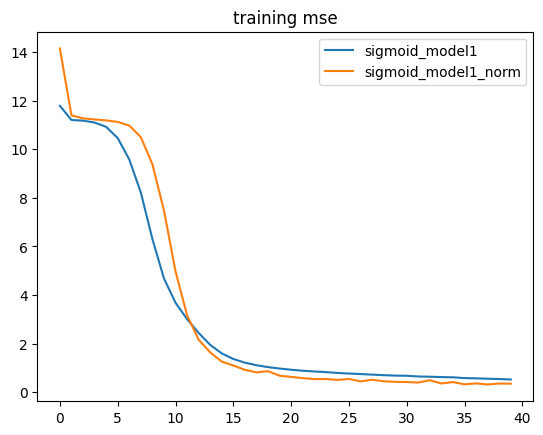

In [39]:
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), losses_train[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

Text(0.5, 1.0, 'training mse')

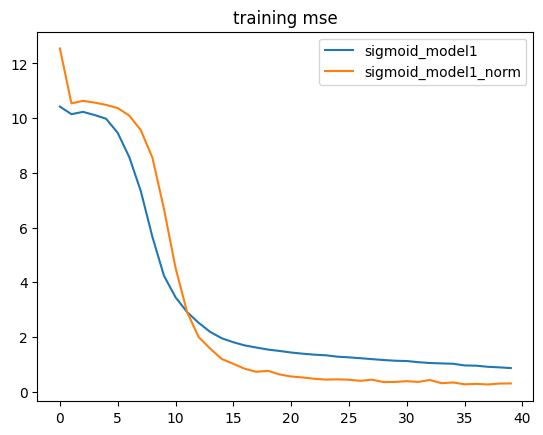

In [40]:
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), losses_test[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

##### 研究momentum参数与模型的性能评估指标的关系

In [41]:
torch.manual_seed(24)

# 实例化模型: 相同的隐藏层层数(depth), 相同的激活函数, 但是一个模型使用归一化层另外一个不使用
sigmoid_model1 = net_class1(act_fun=torch.sigmoid, BN_mode="before", momentum=0.01)
sigmoid_model1_norm = net_class1(act_fun=torch.sigmoid, BN_mode="before", momentum=0.005)

models = [sigmoid_model1, sigmoid_model1_norm]
model_names = ["sigmoid_model1", "sigmoid_model1_norm"]

# 训练模型
n_epochs = 50
losses_train, losses_test = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                      models=models, model_names=model_names, criterion=nn.MSELoss(), optimizer=optim.SGD, lr=0.03,
                                                      task="reg", evaluation=calc_mse)

Text(0.5, 1.0, 'training mse')

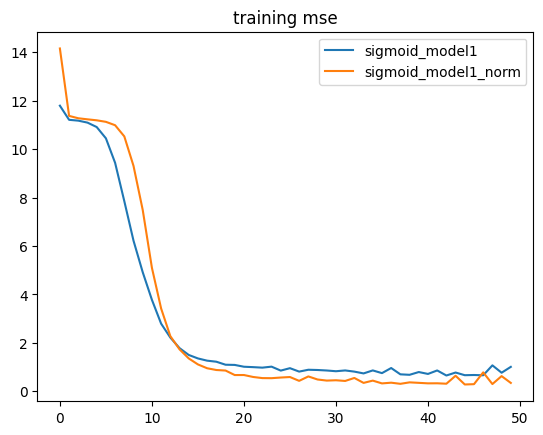

In [42]:
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), losses_train[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

Text(0.5, 1.0, 'training mse')

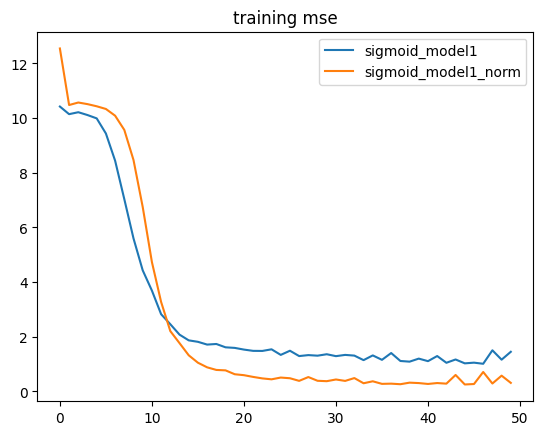

In [43]:
for i, name in enumerate(model_names):
    plt.plot(list(range(n_epochs)), losses_test[i], label=model_names[i])
plt.legend(loc="upper right")
plt.title("training mse")
plt.show()

假设观测特征变量和观测标签之间的自然规律因果关系为: $y = 2x_1^2 - x_2^2 + 3x_3^2 + x_4^2 + 2x_5^2$

In [45]:
torch.manual_seed(1998)

# 加载原始的数据集
X, y = tensorGenReg(w=[2,-1,3,1,2], bias=False, degree=2)

# 如果深度神经网络模型需要学习的数据集的特征变量和标签是分开存储的, 则先将特征变量和标签按照样本的编号进行合并
# 对于合并后的完整的数据集, 先根据指定的比例将其划分为训练数据集和测试数据集
# 再根据指定的样本容量将训练数据集和测试数据集分别划分为若干个互不相交的子数据集
dataset_train, dataset_test = split_loader(X=X, y=y)

In [46]:
X

tensor([[-0.0227, -0.7850,  2.2893, -0.8654, -1.2024],
        [-2.1578, -0.8573,  0.0089, -0.7010, -0.2373],
        [-0.6724, -0.8360, -0.6222,  0.7466, -0.9345],
        ...,
        [ 1.0076, -0.7548, -1.3603,  0.1288,  1.5395],
        [-0.2468, -0.0384,  0.7580,  0.8118,  0.3211],
        [ 0.2131,  0.6267, -0.5577, -1.7191,  1.0556]])

In [49]:
torch.manual_seed(24)

# 实例化模型: 相同的隐藏层层数(depth), 相同的激活函数, 但是一个模型使用归一化层另外一个不使用
sigmoid_model1 = net_class1(in_features=5, act_fun=torch.sigmoid, BN_mode=None)
sigmoid_model1_norm = net_class1(in_features=5, act_fun=torch.sigmoid, BN_mode="before")

models1 = [sigmoid_model1, sigmoid_model1_norm]
model_names1 = ["sigmoid_model1", "sigmoid_model1_norm"]

# 训练模型
n_epochs = 40
losses_train1, losses_test1 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                      models=models1, model_names=model_names1, criterion=nn.MSELoss(), optimizer=optim.SGD, lr=0.03,
                                                      task="reg", evaluation=calc_mse)

torch.manual_seed(24)

# 实例化模型: 相同的隐藏层层数(depth), 相同的激活函数, 但是一个模型使用归一化层另外一个不使用
sigmoid_model2 = net_class2(in_features=5, act_fun=torch.sigmoid, BN_mode=None)
sigmoid_model2_norm = net_class2(in_features=5, act_fun=torch.sigmoid, BN_mode="before")

models2 = [sigmoid_model2, sigmoid_model2_norm]
model_names2 = ["sigmoid_model2", "sigmoid_model2_norm"]

# 训练模型
n_epochs = 40
losses_train2, losses_test2 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                      models=models2, model_names=model_names2, criterion=nn.MSELoss(), optimizer=optim.SGD, lr=0.03,
                                                      task="reg", evaluation=calc_mse)

torch.manual_seed(24)

# 实例化模型: 相同的隐藏层层数(depth), 相同的激活函数, 但是一个模型使用归一化层另外一个不使用
sigmoid_model3 = net_class3(in_features=5, act_fun=torch.sigmoid, BN_mode=None)
sigmoid_model3_norm = net_class3(in_features=5, act_fun=torch.sigmoid, BN_mode="before")

models3 = [sigmoid_model3, sigmoid_model3_norm]
model_names3 = ["sigmoid_model3", "sigmoid_model3_norm"]

# 训练模型
n_epochs = 40
losses_train3, losses_test3 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                      models=models3, model_names=model_names3, criterion=nn.MSELoss(), optimizer=optim.SGD, lr=0.03,
                                                      task="reg", evaluation=calc_mse)

torch.manual_seed(24)

# 实例化模型: 相同的隐藏层层数(depth), 相同的激活函数, 但是一个模型使用归一化层另外一个不使用
sigmoid_model4 = net_class4(in_features=5, act_fun=torch.sigmoid, BN_mode=None)
sigmoid_model4_norm = net_class4(in_features=5, act_fun=torch.sigmoid, BN_mode="before")

models4 = [sigmoid_model4, sigmoid_model4_norm]
model_names4 = ["sigmoid_model4", "sigmoid_model4_norm"]

# 训练模型
n_epochs = 40
losses_train4, losses_test4 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                      models=models4, model_names=model_names4, criterion=nn.MSELoss(), optimizer=optim.SGD, lr=0.03,
                                                      task="reg", evaluation=calc_mse)

In [48]:
net_class1?

Init signature:
net_class1(
    in_features=2,
    hidden_features=[4],
    out_features=1,
    bias=True,
    act_fun=<built-in method relu of type object at 0x121190150>,
    BN_mode=None,
    momentum=0.1,
)
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super().__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.

.. note::
    As per the example above, an ``__init__()`` call t

Text(0.5, 1.0, 'training mse. hidden layer=1')

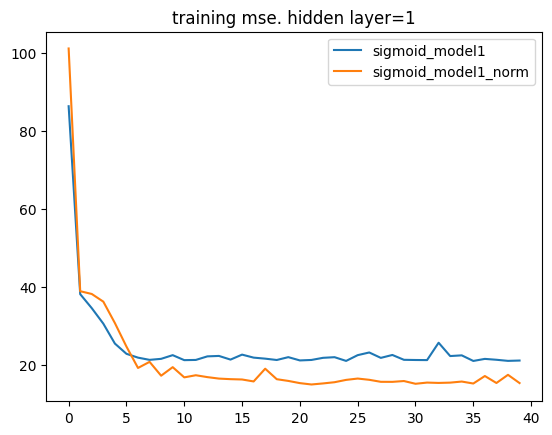

In [51]:
# plt.subplot(551)
for i, name in enumerate(model_names1):
    plt.plot(list(range(n_epochs)), losses_train1[i], label=model_names1[i])
plt.legend(loc="upper right")
plt.title("training mse. hidden layer=1")
plt.show()

Text(0.5, 1.0, 'training mse. hidden layer=2')

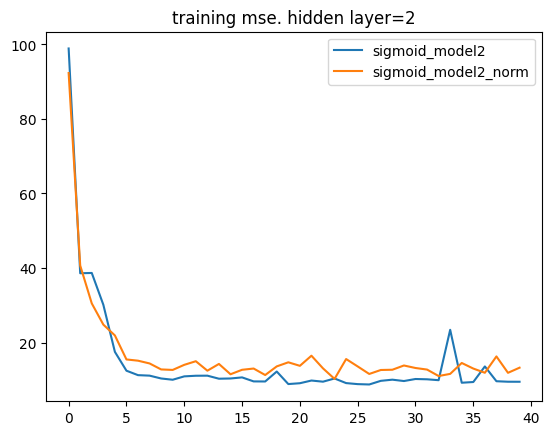

In [52]:
# plt.subplot(552)
for i, name in enumerate(model_names2):
    plt.plot(list(range(n_epochs)), losses_train2[i], label=model_names2[i])
plt.legend(loc="upper right")
plt.title("training mse. hidden layer=2")
plt.show()

Text(0.5, 1.0, 'training mse. hidden layer=3')

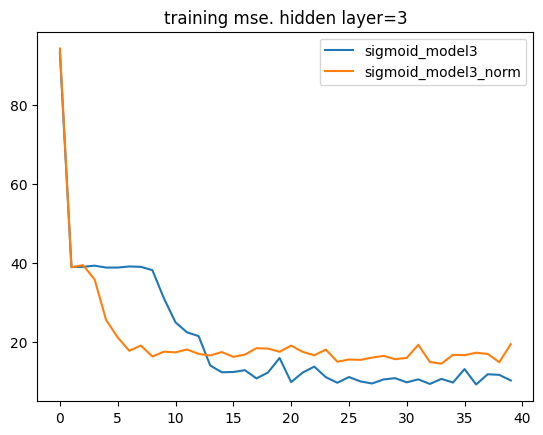

In [53]:
# plt.subplot(552)
for i, name in enumerate(model_names3):
    plt.plot(list(range(n_epochs)), losses_train3[i], label=model_names3[i])
plt.legend(loc="upper right")
plt.title("training mse. hidden layer=3")
plt.show()

Text(0.5, 1.0, 'training mse. hidden layer=4')

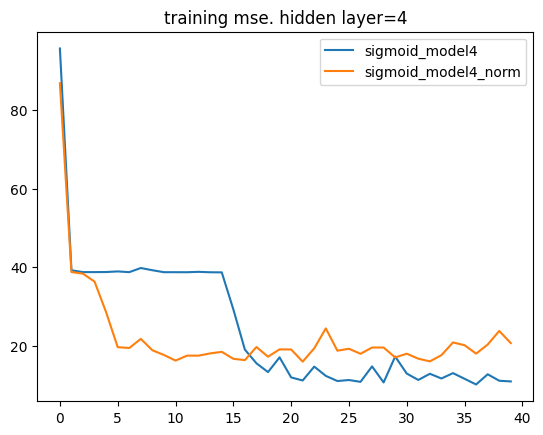

In [54]:
# plt.subplot(552)
for i, name in enumerate(model_names4):
    plt.plot(list(range(n_epochs)), losses_train4[i], label=model_names4[i])
plt.legend(loc="upper right")
plt.title("training mse. hidden layer=4")
plt.show()

Text(0.5, 1.0, 'testing mse. hidden layer=1')

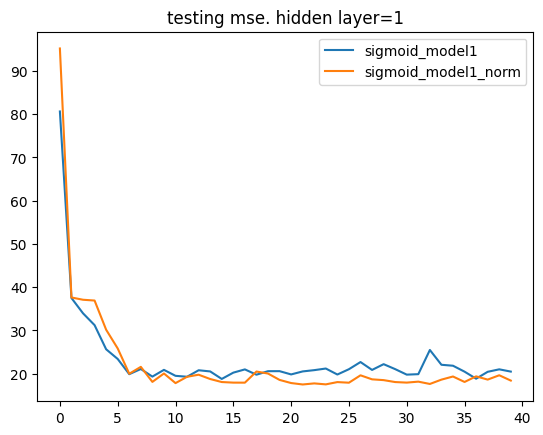

In [59]:
# plt.subplot(551)
for i, name in enumerate(model_names1):
    plt.plot(list(range(n_epochs)), losses_test1[i], label=model_names1[i])
plt.legend(loc="upper right")
plt.title("testing mse. hidden layer=1")
plt.show()

Text(0.5, 1.0, 'testing mse. hidden layer=2')

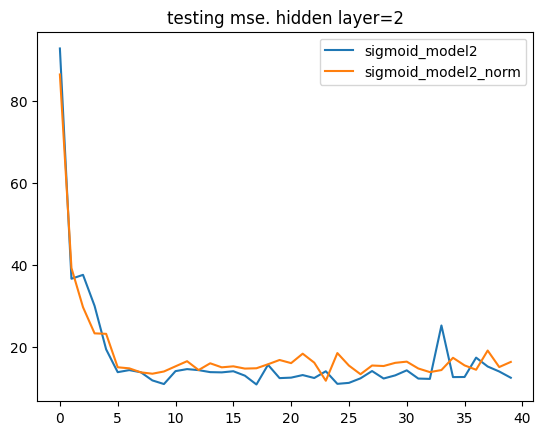

In [62]:
# plt.subplot(551)
for i, name in enumerate(model_names2):
    plt.plot(list(range(n_epochs)), losses_test2[i], label=model_names2[i])
plt.legend(loc="upper right")
plt.title("testing mse. hidden layer=2")
plt.show()

Text(0.5, 1.0, 'testing mse. hidden layer=3')

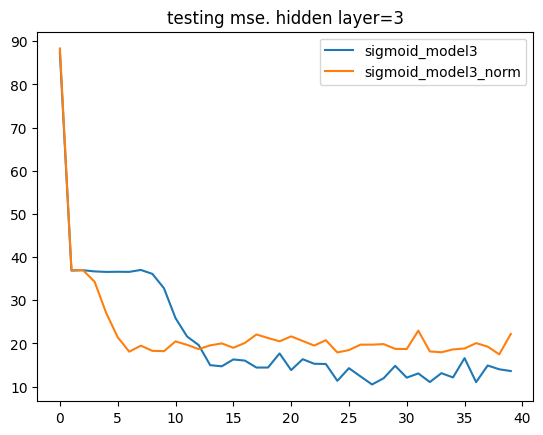

In [61]:
# plt.subplot(551)
for i, name in enumerate(model_names3):
    plt.plot(list(range(n_epochs)), losses_test3[i], label=model_names3[i])
plt.legend(loc="upper right")
plt.title("testing mse. hidden layer=3")
plt.show()

Text(0.5, 1.0, 'training mse. hidden layer=4')

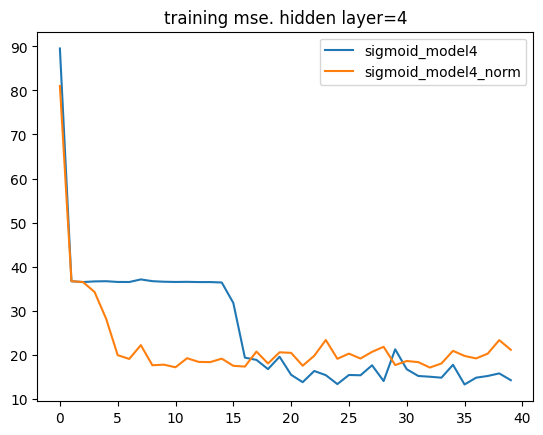

In [63]:
# plt.subplot(551)
for i, name in enumerate(model_names4):
    plt.plot(list(range(n_epochs)), losses_test4[i], label=model_names4[i])
plt.legend(loc="upper right")
plt.title("training mse. hidden layer=4")
plt.show()

Text(0.5, 1.0, 'testing mse')

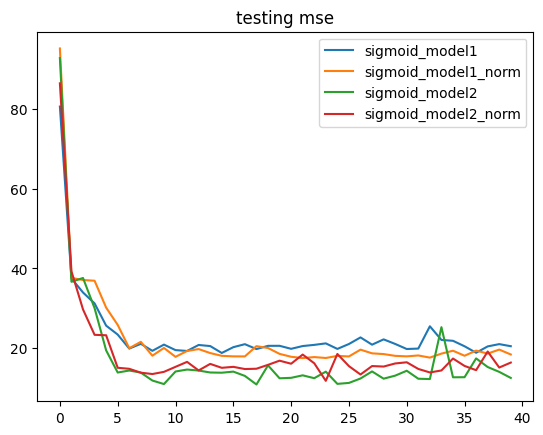

In [67]:
for i, name in enumerate(model_names1):
    plt.plot(list(range(n_epochs)), losses_test1[i], label=name)
for i, name in enumerate(model_names2):
    plt.plot(list(range(n_epochs)), losses_test2[i], label=name)
plt.legend(loc="upper right")
plt.title("testing mse")
plt.show()

Text(0.5, 1.0, 'testing mse')

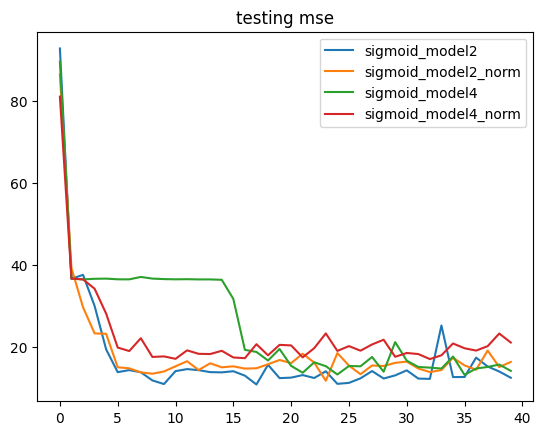

In [68]:
for i, name in enumerate(model_names2):
    plt.plot(list(range(n_epochs)), losses_test2[i], label=name)
for i, name in enumerate(model_names4):
    plt.plot(list(range(n_epochs)), losses_test4[i], label=name)
plt.legend(loc="upper right")
plt.title("testing mse")
plt.show()

In [69]:
torch.manual_seed(24)

# 实例化模型: 相同的隐藏层层数(depth), 相同的激活函数, 但是一个模型使用归一化层另外一个不使用
tanh_model2 = net_class2(in_features=5, act_fun=torch.tanh, BN_mode=None)
tanh_model2_norm = net_class2(in_features=5, act_fun=torch.tanh, BN_mode="before")

models1 = [tanh_model2, tanh_model2_norm]
model_names1 = ["tanh_model2", "tanh_model2_norm"]

# 训练模型
n_epochs = 40
losses_train1h, losses_test1h = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                      models=models1, model_names=model_names1, criterion=nn.MSELoss(), optimizer=optim.SGD, lr=0.03,
                                                      task="reg", evaluation=calc_mse)


Text(0.5, 1.0, 'training mse. hidden layer=2. tanh activation.')

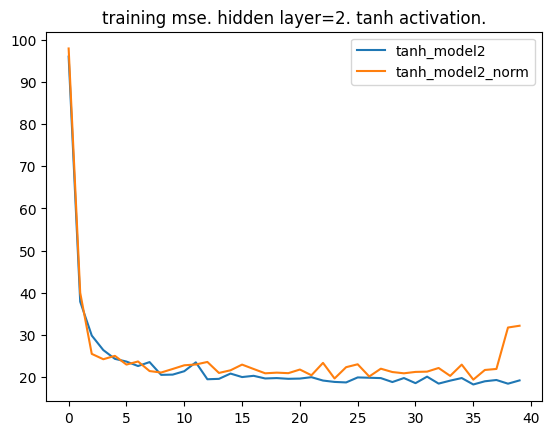

In [71]:
# plt.subplot(551)
for i, name in enumerate(model_names1):
    plt.plot(list(range(n_epochs)), losses_train1h[i], label=model_names1[i])
plt.legend(loc="upper right")
plt.title("training mse. hidden layer=2. tanh activation.")
plt.show()

In [72]:
losses_train1h

tensor([[96.0048, 37.8951, 29.8574, 26.4069, 24.3340, 23.6882, 22.6299, 23.5642,
         20.5340, 20.5935, 21.3987, 23.5058, 19.4929, 19.5905, 20.8417, 20.0140,
         20.3083, 19.6798, 19.7715, 19.5998, 19.6549, 19.9829, 19.1865, 18.8599,
         18.7397, 19.9264, 19.8515, 19.7679, 18.8320, 19.7808, 18.5662, 20.1121,
         18.4626, 19.1654, 19.7808, 18.2545, 19.0124, 19.3168, 18.4420, 19.2206],
        [97.9408, 40.0007, 25.5122, 24.2404, 25.0464, 22.9708, 23.7098, 21.4357,
         21.0892, 21.9330, 22.8068, 22.9951, 23.5983, 20.9911, 21.6170, 22.9676,
         21.9277, 20.9044, 21.0594, 20.9372, 21.7981, 20.4394, 23.3781, 19.6793,
         22.3565, 23.0442, 20.1487, 21.9985, 21.2054, 20.9035, 21.2357, 21.2995,
         22.1647, 20.2909, 22.9656, 19.4062, 21.6947, 21.9379, 31.7633, 32.1844]])

In [73]:
losses_train1h.ndim

2

In [75]:
losses_train1h.shape  # 两个模型, 每一个模型对完整的训练数据集学习40遍

torch.Size([2, 40])

In [76]:
# 获取使用BN的模型在最后五次训练集上的模型性能评估指标
losses_train1h[1, -5:]

tensor([19.4062, 21.6947, 21.9379, 31.7633, 32.1844])

In [77]:
# 计算获取使用BN的模型在最后五次训练集上的模型性能评估指标 的平均值
torch.mean(losses_train1h[1, -5:], dim=0)

tensor(25.3973)

In [78]:
# 获取使用BN的模型在最后五次测试集上的模型性能评估指标
losses_test1h[1, -5:]

tensor([19.1881, 20.6826, 22.4221, 33.1546, 33.8561])

In [79]:
# 计算获取使用BN的模型在最后五次测试集上的模型性能评估指标 的平均值
torch.mean(losses_test1h[1, -5:], dim=0)

tensor(25.8607)

##### experiment1: 学习率learning rate为0.1

In [80]:
torch.manual_seed(1998)

# 实例化模型
# 1.有三层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_3l_tanh = net_class3(in_features=5, act_fun=torch.tanh)
# 2.有三层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_3l_tanh_norm = net_class3(in_features=5, act_fun=torch.tanh, BN_mode="before")
# 3.有四层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_4l_tanh = net_class4(in_features=5, act_fun=torch.tanh)
# 4.有四层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_4l_tanh_norm = net_class4(in_features=5, act_fun=torch.tanh, BN_mode="before")

models_experiment1 = [model_3l_tanh, model_3l_tanh_norm, model_4l_tanh, model_4l_tanh_norm]
model_names_experiment1 = ["model_3l_tanh", "model_3l_tanh_norm", "model_4l_tanh", "model_4l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.1
losses_train_experiment1, losses_test_experiment1 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment1, model_names=model_names_experiment1,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### experiment2: 学习率learning rate为0.03

In [81]:
torch.manual_seed(1998)

# 实例化模型
# 1.有三层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_3l_tanh = net_class3(in_features=5, act_fun=torch.tanh)
# 2.有三层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_3l_tanh_norm = net_class3(in_features=5, act_fun=torch.tanh, BN_mode="before")
# 3.有四层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_4l_tanh = net_class4(in_features=5, act_fun=torch.tanh)
# 4.有四层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_4l_tanh_norm = net_class4(in_features=5, act_fun=torch.tanh, BN_mode="before")

models_experiment2 = [model_3l_tanh, model_3l_tanh_norm, model_4l_tanh, model_4l_tanh_norm]
model_names_experiment2 = ["model_3l_tanh", "model_3l_tanh_norm", "model_4l_tanh", "model_4l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.03
losses_train_experiment2, losses_test_experiment2 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment2, model_names=model_names_experiment2,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### experiment3: 学习率learning rate为0.01

In [82]:
torch.manual_seed(1998)

# 实例化模型
# 1.有三层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_3l_tanh = net_class3(in_features=5, act_fun=torch.tanh)
# 2.有三层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_3l_tanh_norm = net_class3(in_features=5, act_fun=torch.tanh, BN_mode="before")
# 3.有四层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_4l_tanh = net_class4(in_features=5, act_fun=torch.tanh)
# 4.有四层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_4l_tanh_norm = net_class4(in_features=5, act_fun=torch.tanh, BN_mode="before")

models_experiment3 = [model_3l_tanh, model_3l_tanh_norm, model_4l_tanh, model_4l_tanh_norm]
model_names_experiment3 = ["model_3l_tanh", "model_3l_tanh_norm", "model_4l_tanh", "model_4l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.01
losses_train_experiment3, losses_test_experiment3 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment3, model_names=model_names_experiment3,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### experiment4: 学习率learning rate为0.005

In [83]:
torch.manual_seed(1998)

# 实例化模型
# 1.有三层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_3l_tanh = net_class3(in_features=5, act_fun=torch.tanh)
# 2.有三层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_3l_tanh_norm = net_class3(in_features=5, act_fun=torch.tanh, BN_mode="before")
# 3.有四层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_4l_tanh = net_class4(in_features=5, act_fun=torch.tanh)
# 4.有四层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_4l_tanh_norm = net_class4(in_features=5, act_fun=torch.tanh, BN_mode="before")

models_experiment4 = [model_3l_tanh, model_3l_tanh_norm, model_4l_tanh, model_4l_tanh_norm]
model_names_experiment4 = ["model_3l_tanh", "model_3l_tanh_norm", "model_4l_tanh", "model_4l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.005
losses_train_experiment4, losses_test_experiment4 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment4, model_names=model_names_experiment4,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

Text(0.5, 1.0, 'training mse with learning rate: 0.1, tanh activation.')

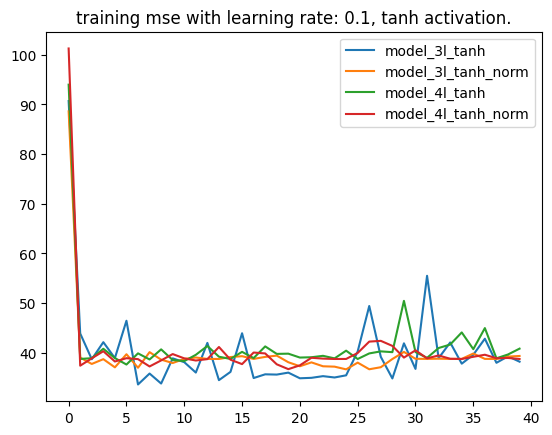

In [84]:
# 检查每一组experiment训练后的模型在一个完整的训练数据集上的模型的性能评估指标
# 每一组experiment有两个模型, 一个是对照模型一个是待验证结论的模型
for i, name in enumerate(model_names_experiment1):
    plt.plot(list(range(n_epochs)), losses_train_experiment1[i], label=name)
plt.legend(loc="upper right")
plt.title("training mse with learning rate: 0.1, tanh activation.")
plt.show()

Text(0.5, 1.0, 'training mse with learning rate: 0.03, tanh activation.')

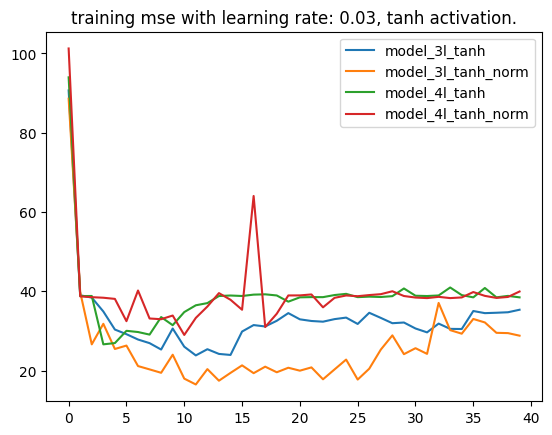

In [85]:
# 检查每一组experiment训练后的模型在一个完整的训练数据集上的模型的性能评估指标
# 每一组experiment有两个模型, 一个是对照模型一个是待验证结论的模型
for i, name in enumerate(model_names_experiment2):
    plt.plot(list(range(n_epochs)), losses_train_experiment2[i], label=name)
plt.legend(loc="upper right")
plt.title("training mse with learning rate: 0.03, tanh activation.")
plt.show()

Text(0.5, 1.0, 'training mse with learning rate: 0.01, tanh activation.')

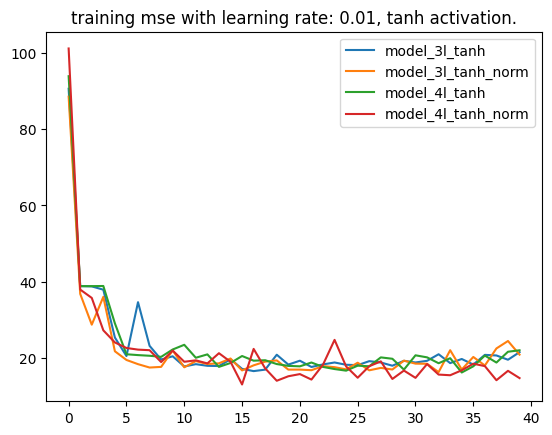

In [86]:
# 检查每一组experiment训练后的模型在一个完整的训练数据集上的模型的性能评估指标
# 每一组experiment有两个模型, 一个是对照模型一个是待验证结论的模型
for i, name in enumerate(model_names_experiment3):
    plt.plot(list(range(n_epochs)), losses_train_experiment3[i], label=name)
plt.legend(loc="upper right")
plt.title("training mse with learning rate: 0.01, tanh activation.")
plt.show()

Text(0.5, 1.0, 'training mse with learning rate: 0.005, tanh activation.')

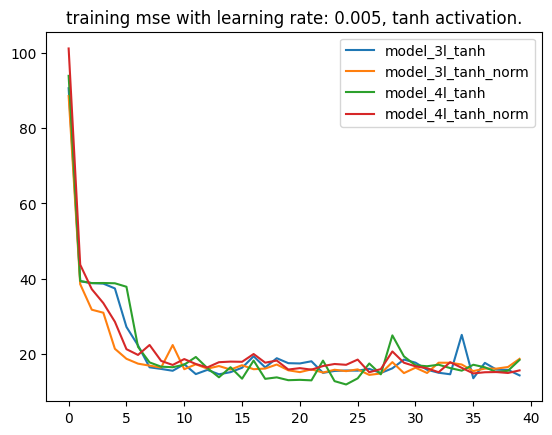

In [87]:
# 检查每一组experiment训练后的模型在一个完整的训练数据集上的模型的性能评估指标
# 每一组experiment有两个模型, 一个是对照模型一个是待验证结论的模型
for i, name in enumerate(model_names_experiment4):
    plt.plot(list(range(n_epochs)), losses_train_experiment4[i], label=name)
plt.legend(loc="upper right")
plt.title("training mse with learning rate: 0.005, tanh activation.")
plt.show()

##### 两层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.01

In [88]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_2l_tanh = net_class2(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_2l_tanh_norm = net_class2(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment1 = [model_2l_tanh, model_2l_tanh_norm]
model_names_experiment1 = ["model_2l_tanh", "model_2l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.01
losses_train_experiment1, losses_test_experiment1 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment1, model_names=model_names_experiment1,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

Text(0.5, 1.0, 'training mse with learning rate: 0.01, tanh activation.')

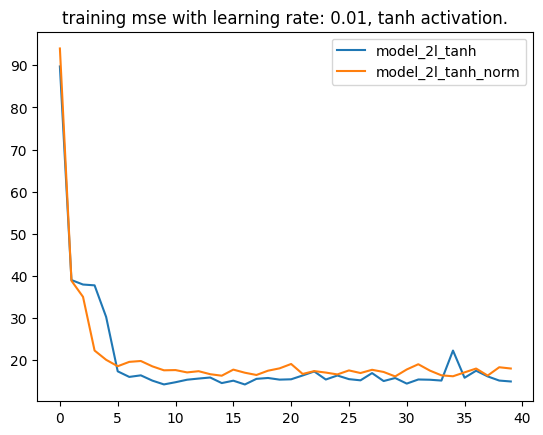

In [89]:
# 检查每一组experiment训练后的模型在一个完整的训练数据集上的模型的性能评估指标
# 每一组experiment有两个模型, 一个是对照模型一个是待验证结论的模型
for i, name in enumerate(model_names_experiment1):
    plt.plot(list(range(n_epochs)), losses_train_experiment1[i], label=name)
plt.legend(loc="upper right")
plt.title("training mse with learning rate: 0.01, tanh activation.")
plt.show()

Text(0.5, 1.0, 'training mse with learning rate: 0.01, tanh activation.')

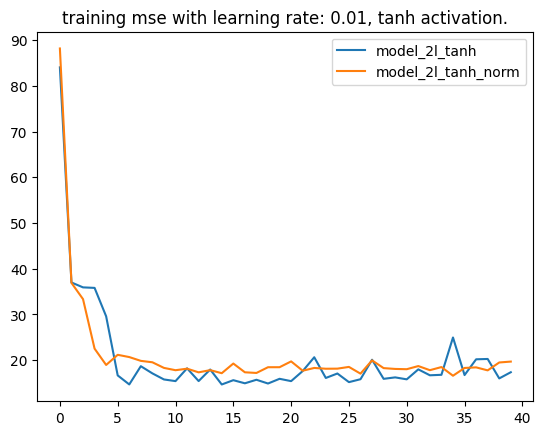

In [90]:
# 检查每一组experiment训练后的模型在一个完整的训练数据集上的模型的性能评估指标
# 每一组experiment有两个模型, 一个是对照模型一个是待验证结论的模型
for i, name in enumerate(model_names_experiment1):
    plt.plot(list(range(n_epochs)), losses_test_experiment1[i], label=name)
plt.legend(loc="upper right")
plt.title("training mse with learning rate: 0.01, tanh activation.")
plt.show()

In [96]:
# 查找模型架构为: 2层隐藏层, 使用tanh激活函数, 使用BN的模型的在训练数据集中最后五轮训练误差
losses_train_experiment1[1, -5:]

tensor([17.0788, 17.9869, 16.3169, 18.2962, 17.9956])

In [95]:
# 计算 模型架构为: 2层隐藏层, 使用tanh激活函数, 使用BN的模型的在训练数据集中最后五轮训练误差 平均值
torch.mean(losses_train_experiment1[1, -5:], dim=0)

tensor(17.5349)

In [97]:
# 查找模型架构为: 2层隐藏层, 使用tanh激活函数, 使用BN的模型的在测试数据集中最后五轮训练误差
losses_test_experiment1[1, -5:]

tensor([18.2924, 18.4235, 17.7664, 19.4938, 19.6895])

In [98]:
# 计算 模型架构为: 2层隐藏层, 使用tanh激活函数, 使用BN的模型的在测试数据集中最后五轮训练误差 平均值
torch.mean(losses_test_experiment1[1, -5:], dim=0)

tensor(18.7331)

##### 两层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.001

In [99]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_2l_tanh = net_class2(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_2l_tanh_norm = net_class2(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment1 = [model_2l_tanh, model_2l_tanh_norm]
model_names_experiment1 = ["model_2l_tanh", "model_2l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.001
losses_train_experiment2, losses_test_experiment2 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment1, model_names=model_names_experiment1,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

In [100]:
# 计算 有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型 在训练数据集完整学习的最后五轮的 平均模型性能评估指标
torch.mean(losses_train_experiment2[1, -5:], dim=0)

tensor(13.4046)

In [101]:
# 计算 有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型 在测试数据集完整学习的最后五轮的 平均模型性能评估指标
torch.mean(losses_test_experiment2[1, -5:], dim=0)

tensor(15.0917)

Text(0.5, 1.0, 'training mse with learning rate: 0.001, tanh activation.')

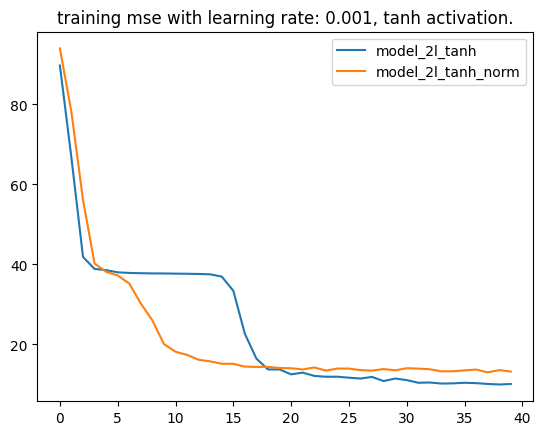

In [103]:
# 检查每一组experiment训练后的模型在一个完整的训练数据集上的模型的性能评估指标
# 每一组experiment有两个模型, 一个是对照模型一个是待验证结论的模型
for i, name in enumerate(model_names_experiment1):
    plt.plot(list(range(n_epochs)), losses_train_experiment2[i], label=name)
plt.legend(loc="upper right")
plt.title("training mse with learning rate: 0.001, tanh activation.")
plt.show()

##### 两层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.005

In [104]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_2l_tanh = net_class2(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_2l_tanh_norm = net_class2(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment1 = [model_2l_tanh, model_2l_tanh_norm]
model_names_experiment1 = ["model_2l_tanh", "model_2l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.005
losses_train_experiment3, losses_test_experiment3 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment1, model_names=model_names_experiment1,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### 两层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.03

In [105]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_2l_tanh = net_class2(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_2l_tanh_norm = net_class2(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment1 = [model_2l_tanh, model_2l_tanh_norm]
model_names_experiment1 = ["model_2l_tanh", "model_2l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.03
losses_train_experiment4, losses_test_experiment4 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment1, model_names=model_names_experiment1,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

In [106]:
# 1.横轴代表学习率的取值. 在计算机的内存中一次性存储多个数值. 数值来自于自定义结果
lrs = [0.001, 0.005, 0.01, 0.03]

# 2.纵轴代表在以上学习率作为超参数训练的模型. 在训练和测试过程中最后五轮epoch学习完整数据集时的 计算平均模型性能评估指标
avg_losses_train = [torch.mean(losses_train_experiment1[1, -5:], dim=0), torch.mean(losses_train_experiment2[1, -5:], dim=0), torch.mean(losses_train_experiment3[1, -5:], dim=0), torch.mean(losses_train_experiment4[1, -5:], dim=0)]
avg_losses_test = [torch.mean(losses_test_experiment1[1, -5:], dim=0), torch.mean(losses_test_experiment2[1, -5:], dim=0), torch.mean(losses_test_experiment3[1, -5:], dim=0), torch.mean(losses_test_experiment4[1, -5:], dim=0)]

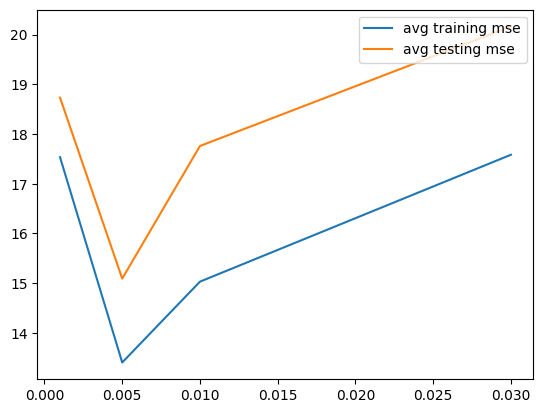

In [107]:
# 绘制折线图
plt.plot(lrs, avg_losses_train, label="avg training mse")
plt.plot(lrs, avg_losses_test, label="avg testing mse")
plt.legend(loc="upper right")
plt.show()

##### 实验设计: 比较相同学习率梯度下. 使用tanh激活函数, 两层隐藏层的深度神经网络模型是否应该设置归一化层

In [110]:
# 设置相同学习率梯度
lrs = [0.001, 0.005, 0.01, 0.03]

# 不带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的训练数据集上 计算平均模型性能评估指标值
avg_losses_train_noBN = [torch.mean(losses_train_experiment1[0][-5:], dim=0), torch.mean(losses_train_experiment2[0][-5:], dim=0), torch.mean(losses_train_experiment3[0][-5:], dim=0), torch.mean(losses_train_experiment4[0][-5:], dim=0)] 
# 不带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的测试数据集上 计算平均模型性能评估指标值
avg_losses_test_noBN = [torch.mean(losses_test_experiment1[0][-5:], dim=0), torch.mean(losses_test_experiment2[0][-5:], dim=0), torch.mean(losses_test_experiment3[0][-5:], dim=0), torch.mean(losses_test_experiment4[0][-5:], dim=0)] 

Text(0.5, 1.0, 'hidden layer: 2, tanh activation function, without batch normalization.')

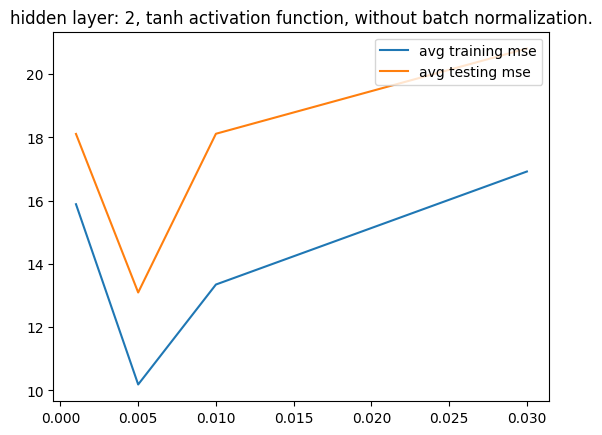

In [111]:
# 绘制折线图
plt.plot(lrs, avg_losses_train_noBN, label="avg training mse")
plt.plot(lrs, avg_losses_test_noBN, label="avg testing mse")
plt.legend(loc="upper right")
plt.title("hidden layer: 2, tanh activation function, without batch normalization.")
plt.show()

In [112]:
# 设置相同学习率梯度
lrs = [0.001, 0.005, 0.01, 0.03]

# 带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的训练数据集上 计算平均模型性能评估指标值
avg_losses_train_BN = [torch.mean(losses_train_experiment1[1][-5:], dim=0), torch.mean(losses_train_experiment2[1][-5:], dim=0), torch.mean(losses_train_experiment3[1][-5:], dim=0), torch.mean(losses_train_experiment4[1][-5:], dim=0)] 
# 带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的测试数据集上 计算平均模型性能评估指标值
avg_losses_test_BN = [torch.mean(losses_test_experiment1[1][-5:], dim=0), torch.mean(losses_test_experiment2[1][-5:], dim=0), torch.mean(losses_test_experiment3[1][-5:], dim=0), torch.mean(losses_test_experiment4[1][-5:], dim=0)] 

Text(0.5, 1.0, 'hidden layer: 2, tanh activation function, with batch normalization.')

(4.0, 25.0)

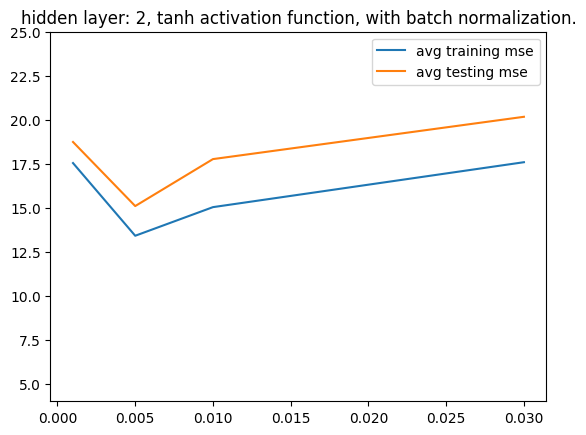

In [114]:
# 绘制折线图
plt.plot(lrs, avg_losses_train_BN, label="avg training mse")
plt.plot(lrs, avg_losses_test_BN, label="avg testing mse")
plt.legend(loc="upper right")
plt.title("hidden layer: 2, tanh activation function, with batch normalization.")
plt.ylim(bottom=4, top=25)
plt.show()

##### 三层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.001

In [116]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_3l_tanh = net_class3(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_3l_tanh_norm = net_class3(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment1 = [model_3l_tanh, model_3l_tanh_norm]
model_names_experiment1 = ["model_3l_tanh", "model_3l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.001
losses_train_experiment1, losses_test_experiment1 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment1, model_names=model_names_experiment1,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### 三层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.005

In [118]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_3l_tanh = net_class3(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_3l_tanh_norm = net_class3(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment2 = [model_3l_tanh, model_3l_tanh_norm]
model_names_experiment2 = ["model_3l_tanh", "model_3l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.005
losses_train_experiment2, losses_test_experiment2 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment2, model_names=model_names_experiment2,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### 三层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.01

In [119]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_3l_tanh = net_class3(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_3l_tanh_norm = net_class3(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment3 = [model_3l_tanh, model_3l_tanh_norm]
model_names_experiment3 = ["model_3l_tanh", "model_3l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.01
losses_train_experiment3, losses_test_experiment3 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment3, model_names=model_names_experiment3,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### 三层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.03

In [120]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_3l_tanh = net_class3(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_3l_tanh_norm = net_class3(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment3 = [model_3l_tanh, model_3l_tanh_norm]
model_names_experiment3 = ["model_3l_tanh", "model_3l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.03
losses_train_experiment4, losses_test_experiment4 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment4, model_names=model_names_experiment4,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

In [121]:
# 设置相同学习率梯度
lrs = [0.001, 0.005, 0.01, 0.03]

# 不带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的训练数据集上 计算平均模型性能评估指标值
avg_losses_train_noBN = [torch.mean(losses_train_experiment1[0][-5:], dim=0), torch.mean(losses_train_experiment2[0][-5:], dim=0), torch.mean(losses_train_experiment3[0][-5:], dim=0), torch.mean(losses_train_experiment4[0][-5:], dim=0)] 
# 不带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的测试数据集上 计算平均模型性能评估指标值
avg_losses_test_noBN = [torch.mean(losses_test_experiment1[0][-5:], dim=0), torch.mean(losses_test_experiment2[0][-5:], dim=0), torch.mean(losses_test_experiment3[0][-5:], dim=0), torch.mean(losses_test_experiment4[0][-5:], dim=0)] 

Text(0.5, 1.0, 'hidden layer: 3, tanh activation function, without batch normalization.')

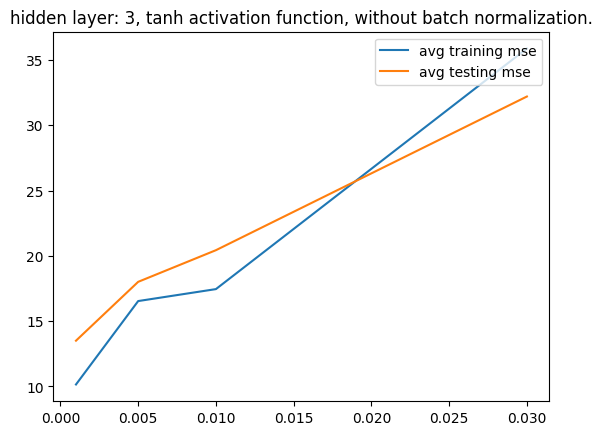

In [125]:
# 绘制折线图
plt.plot(lrs, avg_losses_train_noBN, label="avg training mse")
plt.plot(lrs, avg_losses_test_noBN, label="avg testing mse")
plt.legend(loc="upper right")
plt.title("hidden layer: 3, tanh activation function, without batch normalization.")
plt.show()

In [123]:
# 设置相同学习率梯度
lrs = [0.001, 0.005, 0.01, 0.03]

# 带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的训练数据集上 计算平均模型性能评估指标值
avg_losses_train_BN = [torch.mean(losses_train_experiment1[1][-5:], dim=0), torch.mean(losses_train_experiment2[1][-5:], dim=0), torch.mean(losses_train_experiment3[1][-5:], dim=0), torch.mean(losses_train_experiment4[1][-5:], dim=0)] 
# 带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的测试数据集上 计算平均模型性能评估指标值
avg_losses_test_BN = [torch.mean(losses_test_experiment1[1][-5:], dim=0), torch.mean(losses_test_experiment2[1][-5:], dim=0), torch.mean(losses_test_experiment3[1][-5:], dim=0), torch.mean(losses_test_experiment4[1][-5:], dim=0)] 

Text(0.5, 1.0, 'hidden layer: 3, tanh activation function, with batch normalization.')

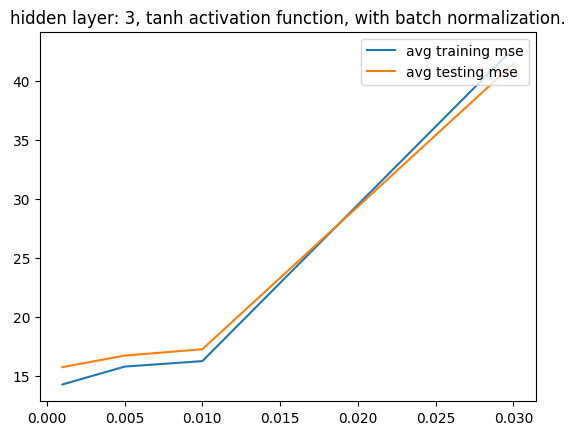

In [126]:
# 绘制折线图
plt.plot(lrs, avg_losses_train_BN, label="avg training mse")
plt.plot(lrs, avg_losses_test_BN, label="avg testing mse")
plt.legend(loc="upper right")
plt.title("hidden layer: 3, tanh activation function, with batch normalization.")
# plt.ylim(bottom=4, top=25)
plt.show()

##### 四层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.001

In [127]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_4l_tanh = net_class4(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_4l_tanh_norm = net_class4(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment1 = [model_4l_tanh, model_4l_tanh_norm]
model_names_experiment1 = ["model_4l_tanh", "model_4l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.001
losses_train_experiment1, losses_test_experiment1 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment1, model_names=model_names_experiment1,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### 四层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.005

In [130]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_4l_tanh = net_class4(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_4l_tanh_norm = net_class4(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment2 = [model_4l_tanh, model_4l_tanh_norm]
model_names_experiment2 = ["model_4l_tanh", "model_4l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.005
losses_train_experiment2, losses_test_experiment2 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment2, model_names=model_names_experiment2,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### 四层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.01

In [131]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_4l_tanh = net_class4(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_4l_tanh_norm = net_class4(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment3 = [model_4l_tanh, model_4l_tanh_norm]
model_names_experiment3 = ["model_4l_tanh", "model_4l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.01
losses_train_experiment3, losses_test_experiment3 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment3, model_names=model_names_experiment3,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

##### 四层隐藏层, tanh激活函数, 一个模型不使用BN(对照模型)另外一个模型使用BN(待验证结论的模型)
##### 学习率大小: 0.03

In [132]:
torch.manual_seed(1998)

# 实例化模型
# 1.有两层隐藏层, 使用tanh激活函数, 不带归一化层的深度神经网络模型
model_4l_tanh = net_class4(in_features=5, act_fun=torch.tanh)
# 2.有两层隐藏层, 使用tanh激活函数, 带归一化层的深度神经网络模型
model_4l_tanh_norm = net_class4(in_features=5, act_fun=torch.tanh, BN_mode="before")


models_experiment4 = [model_4l_tanh, model_4l_tanh_norm]
model_names_experiment4 = ["model_4l_tanh", "model_4l_tanh_norm"]

# 训练模型
n_epochs = 40
eta = 0.03
losses_train_experiment4, losses_test_experiment4 = compare_models_performance(dataset_train=dataset_train, dataset_test=dataset_test, n_epochs=n_epochs,
                                                                              models=models_experiment4, model_names=model_names_experiment4,
                                                                              criterion=nn.MSELoss(), optimizer=optim.SGD, lr=eta,
                                                                              task="reg", evaluation=calc_mse)

In [133]:
# 设置相同学习率梯度
lrs = [0.001, 0.005, 0.01, 0.03]

# 不带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的训练数据集上 计算平均模型性能评估指标值
avg_losses_train_noBN = [torch.mean(losses_train_experiment1[0][-5:], dim=0), torch.mean(losses_train_experiment2[0][-5:], dim=0), torch.mean(losses_train_experiment3[0][-5:], dim=0), torch.mean(losses_train_experiment4[0][-5:], dim=0)] 
# 不带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的测试数据集上 计算平均模型性能评估指标值
avg_losses_test_noBN = [torch.mean(losses_test_experiment1[0][-5:], dim=0), torch.mean(losses_test_experiment2[0][-5:], dim=0), torch.mean(losses_test_experiment3[0][-5:], dim=0), torch.mean(losses_test_experiment4[0][-5:], dim=0)] 

Text(0.5, 1.0, 'hidden layer: 4, tanh activation function, without batch normalization.')

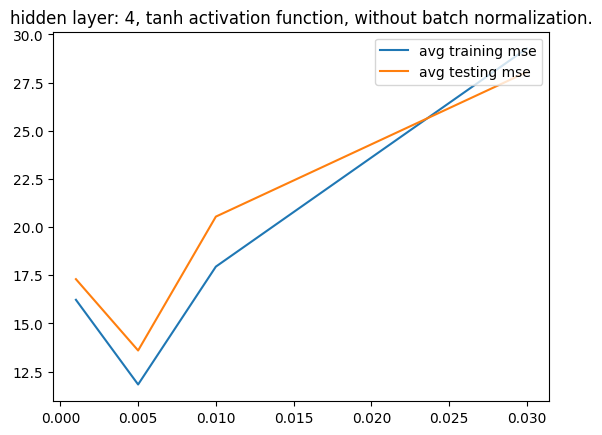

In [135]:
# 绘制折线图
plt.plot(lrs, avg_losses_train_noBN, label="avg training mse")
plt.plot(lrs, avg_losses_test_noBN, label="avg testing mse")
plt.legend(loc="upper right")
plt.title("hidden layer: 4, tanh activation function, without batch normalization.")
plt.show()

In [136]:
# 设置相同学习率梯度
lrs = [0.001, 0.005, 0.01, 0.03]

# 带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的训练数据集上 计算平均模型性能评估指标值
avg_losses_train_BN = [torch.mean(losses_train_experiment1[1][-5:], dim=0), torch.mean(losses_train_experiment2[1][-5:], dim=0), torch.mean(losses_train_experiment3[1][-5:], dim=0), torch.mean(losses_train_experiment4[1][-5:], dim=0)] 
# 带归一化层的模型 查找在训练过程中的最后五轮迭代epoch在完整的测试数据集上 计算平均模型性能评估指标值
avg_losses_test_BN = [torch.mean(losses_test_experiment1[1][-5:], dim=0), torch.mean(losses_test_experiment2[1][-5:], dim=0), torch.mean(losses_test_experiment3[1][-5:], dim=0), torch.mean(losses_test_experiment4[1][-5:], dim=0)] 

Text(0.5, 1.0, 'hidden layer: 4, tanh activation function, with batch normalization.')

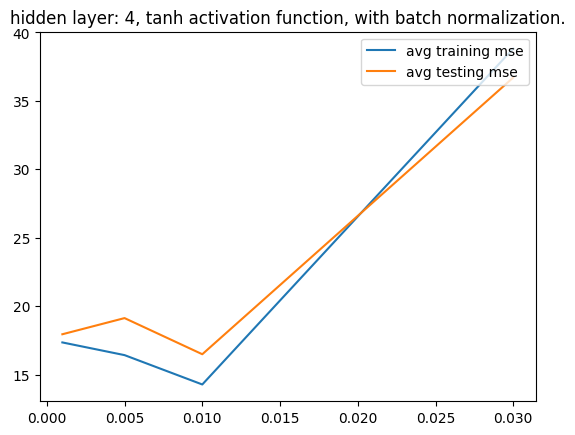

In [137]:
# 绘制折线图
plt.plot(lrs, avg_losses_train_BN, label="avg training mse")
plt.plot(lrs, avg_losses_test_BN, label="avg testing mse")
plt.legend(loc="upper right")
plt.title("hidden layer: 4, tanh activation function, with batch normalization.")
# plt.ylim(bottom=4, top=25)
plt.show()